In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from grade import Exo1, Exo2
import hashlib

sns.set()

¿Sobre qué datos vamos a trabajar? Vamos a cargar en el siguiente bloque una serie y un data frame, de los archivos "serie.csv" y "dataframe.csv"

In [2]:
serie = pd.read_csv("serie.csv").iloc[:,0]
df = pd.read_csv("dataframe.csv")
simple = pd.read_csv("simple.csv")

# Z-Score

Calcule el z-score para cada valor de la serie, y descarte los valores considerados atípicos cuando éste supera el valor 2.5. Para verificar si su respuesta es correcta, busque la suma de todos los valores que no descartó, haga un cast a un `int` (o lo que es lo mismo, "floor" al flotante que les quede) y pásenselo a la función Exo1.

In [22]:
# Ordenamos la serie
serie_ord = serie.copy().sort_values() # Hay que arreglar esto

mean = serie.mean()
dev = serie.std()
# Calculamos el z-score
zscore = (serie_ord-mean)/dev # Hay que arreglar esto

# Descartamos los valores que no nos interesan
zscore = zscore[abs(zscore)<2.5]

# Hacemos la suma de estos, y hacemos cast a un int
Exo1(int(serie[zscore].sum()))

Instarreprobado >:v


False

# IQR

Misma mentalidad, pero ahora calcule los cuartile susando `np.percentile` y `np.logical_and`

In [15]:
Q1 = np.percentile(serie, 25)
Q3 = np.percentile(serie, 75)

IQR = Q3 - Q1

serie_iqr = serie[np.logical_and(serie > Q1 - 1.5*IQR, serie < Q3 + 1.5*IQR)]

# Hacemos la suma de estos, y hacemos cast a un int
Exo2(int(serie_iqr.sum()))

Lo lograste! :v


True

# DBSCAN

Contemple la distribución de puntos de df

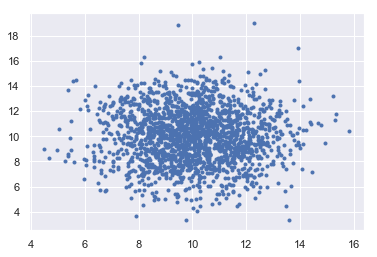

In [23]:
plt.plot(simple.iloc[:,0], simple.iloc[:,1], '.')

Como último ejercicio, haga la implementación correcta de la clase `DBSCAN`. Para ello, está la función auxiliar `euclidean`

In [25]:
def euclidean(x, y):
    return np.linalg.norm(x - y)

In [31]:
def calcDistances(row):
    return pd.Series(np.sqrt(np.sum((simple.values - row.values)**2, axis = 1)))
distMat = simple.apply(calcDistances, axis = 1)
#(distMat < 3).sum()

El único método a implementar es la función `classify`, que toma como único argumento los datos, los guarda, y debe guardar los índices de los puntos clasificados como Núcleo, Frontera y valores atípicos.

In [32]:
class DBSCAN:
    def __init__(self, epsilon, minPts, metric = euclidean):
        self.epsilon = epsilon
        self.minPts = minPts
        self.metric = metric
        self.kernelPoints = []
        self.frontierPoints = []
        self.outliers = []

    def classify(self, data):
        def calcDistances(row):
            return pd.Series(np.sqrt(np.sum((data.values - row.values)**2, axis = 1)))
        distMat = data.apply(calcDistances, axis = 1)
        neighs = (distMat < self.epsilon).sum()
        self.kernelPoints = neighs[neighs >= self.minPts].index
        # Extract not kernel points
        tmp = distMat.loc[distMat.index.difference(self.kernelPoints),:]
        # Check which ones have kernel points in the ball of radius epsilon
        tmp = tmp.apply(lambda row: any(row[self.kernelPoints] < self.epsilon), axis = 1)
        # extract indices
        self.frontierPoints = tmp[tmp].index
        self.outliers = distMat.index.difference(self.kernelPoints)
        self.outliers = self.outliers.difference(self.frontierPoints)

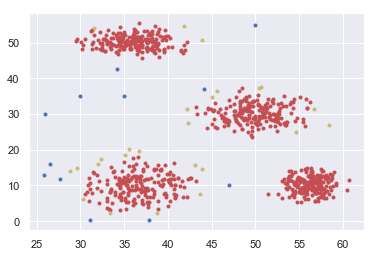

In [59]:
db = DBSCAN(3, 10)

def superplot(data):
    db.classify(data)

    plt.plot(data.iloc[db.kernelPoints,0], data.iloc[db.kernelPoints,1], 'r.')
    plt.plot(data.iloc[db.frontierPoints,0], data.iloc[db.frontierPoints,1], 'y.')
    plt.plot(data.iloc[db.outliers,0], data.iloc[db.outliers,1], 'b.')
    
superplot(df)

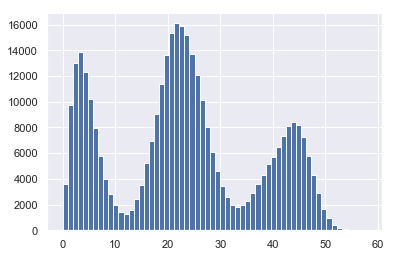

In [57]:
def distanceHist(data):
    def calcDistances(row):
        return pd.Series(np.sqrt(np.sum((data.values - row.values)**2, axis = 1)))
    distMat = data.apply(calcDistances, axis = 1)
    up = pd.DataFrame(np.triu(distMat))
    pd.Series(up[up != 0].values.reshape(up.shape[0]*up.shape[1])).dropna().hist(bins = 60)
    
distanceHist(df)

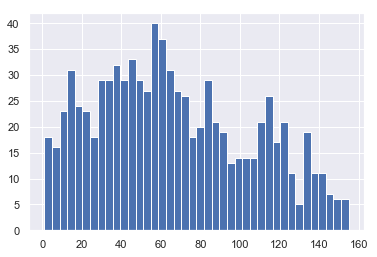

In [58]:
def neighborsHist(data, epsilon):
    def calcDistances(row):
        return pd.Series(np.sqrt(np.sum((data.values - row.values)**2, axis = 1)))
    distMat = data.apply(calcDistances, axis = 1)
    (distMat < epsilon).sum().hist(bins = 40)
neighborsHist(df,3)

In [ ]:
#pd.DataFrame(np.random.multivariate_normal([10, 10], [[3, 0], [0, 5]], 1865), columns = ["X", "Y"]).to_csv("simple.csv", index=False)